In [2]:
%matplotlib inline
import numpy as np
import pymongo
import pandas as pd
from textblob import TextBlob
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dbcon = pymongo.MongoClient()
messages_fields = ['mid', 'conversation', 'read', 'body', 'created']
messages = pd.DataFrame(list(dbcon.lokely.messages.find()), columns=messages_fields).dropna()

In [5]:
data = messages
subjectivities = []
polarities = []
hours = []
minutes = []
daysofweek = []
for i in range(len(messages)):
    msg = TextBlob(data.iloc[i].body)
    subjectivities.append(msg.sentiment.subjectivity)
    polarities.append(msg.sentiment.polarity)
    hours.append(data.iloc[i].created.hour)
    minutes.append(data.iloc[i].created.minute)
    daysofweek.append(data.iloc[i].created.dayofweek)

data['subjectivity'] = subjectivities  
data['polarity'] = polarities  
data['hour'] = hours
data['minute'] = minutes
data['dayofweek'] = daysofweek

In [6]:
data.sort_values(by=['polarity'],ascending=True)[0:4]

,mid,conversation,read,body,created,subjectivity,polarity,hour,minute,dayofweek
2016,1338.0,570ced1b72f6bc9b52772768.570ced1b72f6bc9b5277276a,True,terrible,2016-01-24 23:42:29,1.000000,-1.00,23,42,6
2014,1328.0,570ced1b72f6bc9b52772768.570ced1b72f6bc9b5277276a,True,so ugly,2016-01-24 23:41:49,1.000000,-0.70,23,41,6
487,1624.0,570ced1472f6bc9b52772523.570ced1b72f6bc9b52772795,True,"We do get some pushback on sign up fields, but...",2016-02-10 23:43:45,0.666667,-0.70,23,43,2
1253,176.0,570ced1472f6bc9b52772567.570ced1472f6bc9b5277256a,True,"I like bad bitches, that's my fucking problem",2016-01-25 12:49:41,0.733333,-0.65,12,49,0


In [7]:
# data[data.created > '2016-01-26'].minute.value_counts()
data.iloc[487].body

u"We do get some pushback on sign up fields, but conversion from downloads to sign ups isn't bad.  We're simplifying it though "

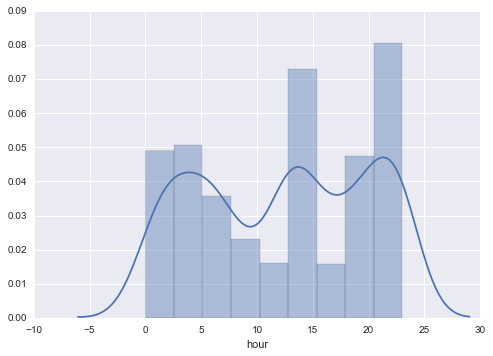

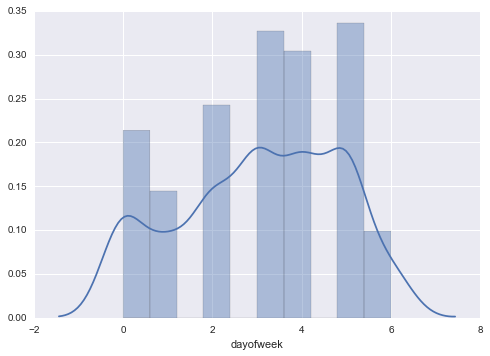

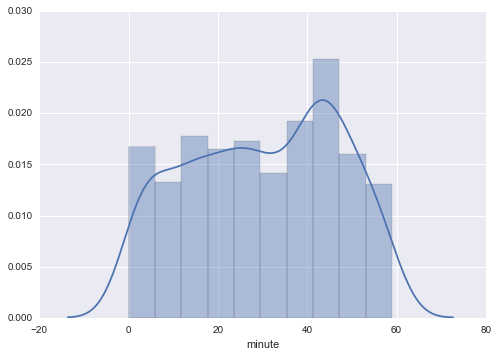

In [8]:
data_after_import = data[data.created > '2016-01-26']
sns.distplot(data_after_import['hour'])
plt.show()
sns.distplot(data_after_import['dayofweek'])
plt.show()
sns.distplot(data_after_import['minute'])
plt.show()

In [9]:
data_after_import.corr()

,mid,subjectivity,polarity,hour,minute,dayofweek
mid,1.000000,0.259215,0.221774,-0.055595,-0.101836,-0.193038
subjectivity,0.259215,1.000000,0.685708,-0.050037,-0.022647,-0.168905
polarity,0.221774,0.685708,1.000000,-0.006551,-0.001376,-0.158590
hour,-0.055595,-0.050037,-0.006551,1.000000,0.101313,-0.205781
minute,-0.101836,-0.022647,-0.001376,0.101313,1.000000,0.040747
dayofweek,-0.193038,-0.168905,-0.158590,-0.205781,0.040747,1.000000


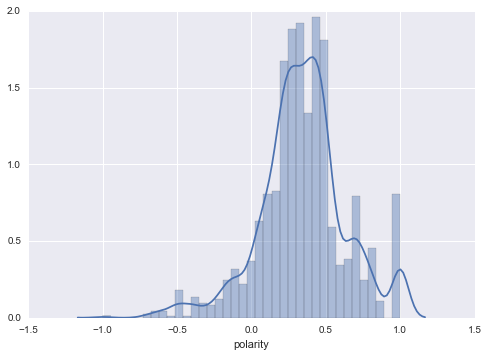

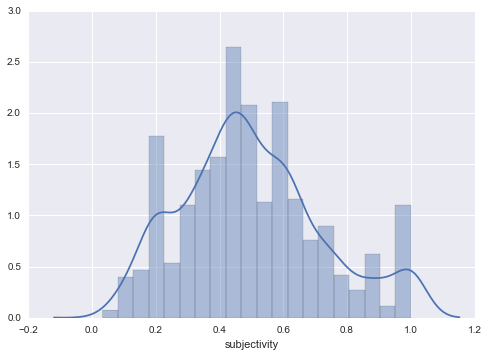

In [10]:
sns.distplot(data[data['polarity'] != 0]['polarity'])
plt.show()
sns.distplot(data[data['subjectivity'] > 0]['subjectivity'])
plt.show()

In [11]:
'Mean polarity: {}, mean subjectivity: {}'.format(np.mean(data[data['polarity'] != 0.00]['polarity']), np.mean(data[data['subjectivity'] != 0.00]['subjectivity']))

'Mean polarity: 0.342720033147, mean subjectivity: 0.501054822183'